In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
bankdata=pd.read_csv('bank_marketing.csv')

In [3]:
bankdata

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
bankdata.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
bankdata.rename(columns={'y':'subscribed'}, inplace=True)

In [7]:
#find percentage of missing values for each column
missing_values = bankdata.isnull().mean()*100

missing_values.sum()

0.0

So we see that there are no missing values.

Dealing with missing values. The values labelled "unknown" could be treated as a class label itself

In [8]:
#Check for categorical and numerical data

In [9]:
data_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", 
                  "poutcome", "subscribed"]
data_numerical = ["ID","age","balance","day","duration", "campaign", "pdays", "previous"]
print(len(data_categorical), len(data_numerical))

10 8


In [10]:
bankdata.replace('unknown', np.NaN, inplace=True)

In [11]:
bankdata.isnull()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
31643,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
31644,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
31645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
bankdata.isnull().sum()

ID                0
age               0
job             206
marital           0
education      1314
default           0
balance           0
housing           0
loan              0
contact        9177
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome      25929
subscribed        0
dtype: int64

In [13]:
# Number of distinct values in dataset variables
for i, column in enumerate(bankdata.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(bankdata[column].nunique()))

0. Id: 31647
1. Age: 76
2. Job: 11
3. Marital: 3
4. Education: 3
5. Default: 2
6. Balance: 6326
7. Housing: 2
8. Loan: 2
9. Contact: 2
10. Day: 31
11. Month: 12
12. Duration: 1454
13. Campaign: 45
14. Pdays: 509
15. Previous: 38
16. Poutcome: 3
17. Subscribed: 2


In [14]:
bankdata.rename(columns={'y':'subscribed'}, inplace=True)

In [15]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                     

Exploratory data analysis

i. Univariate analysis and segmented univariate analysis

a. Categorical variables

Job


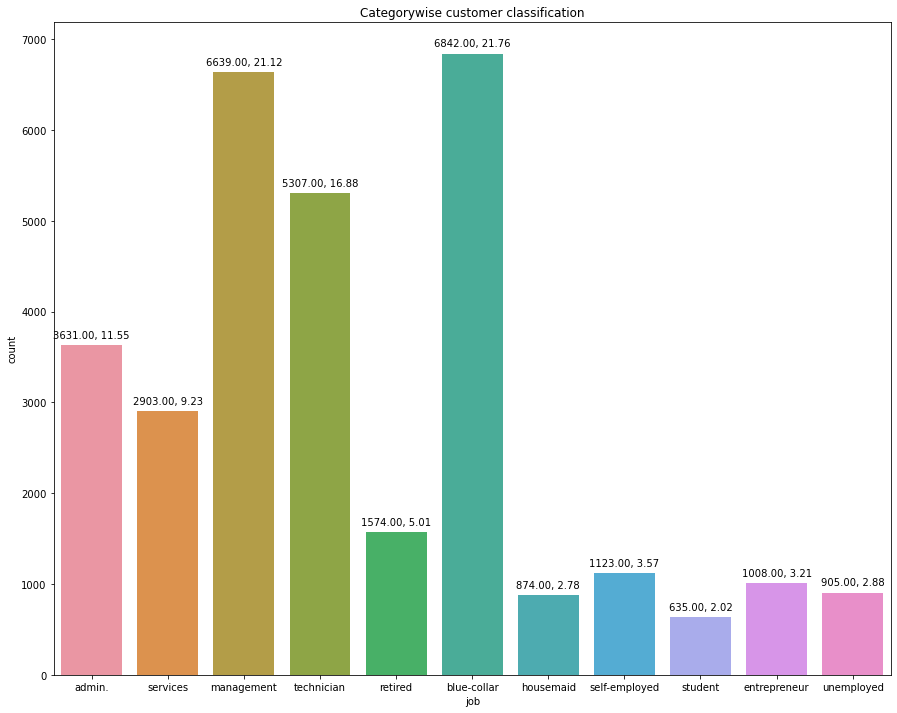

Marital


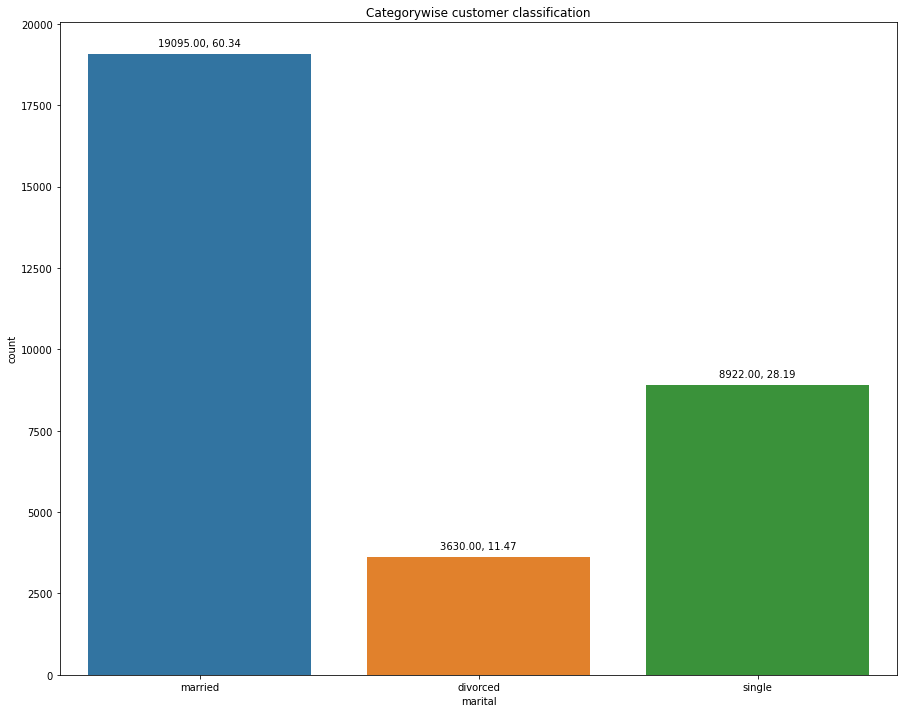

Education


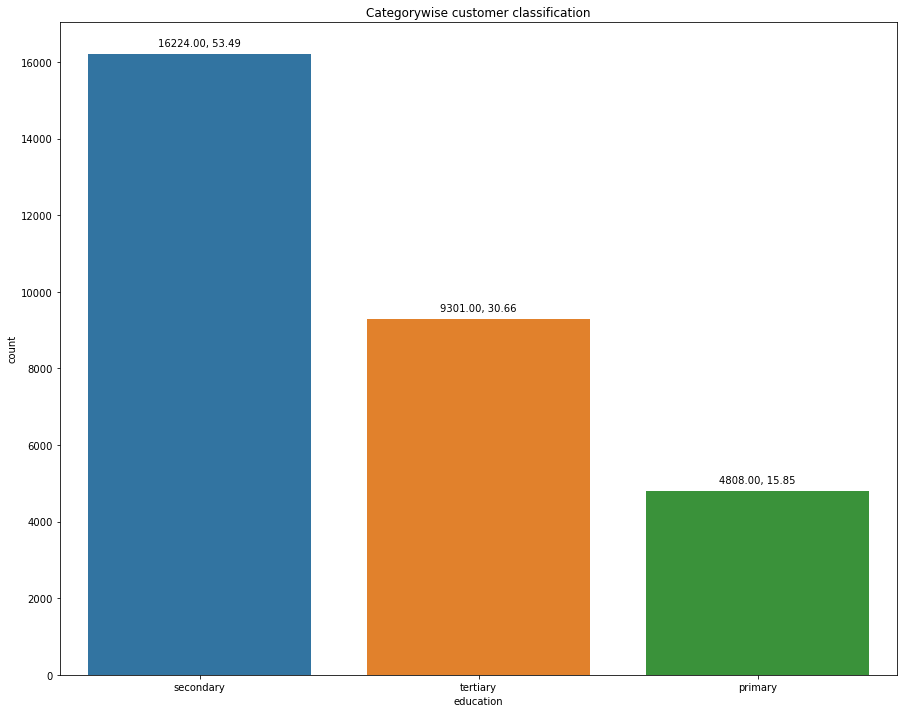

Default


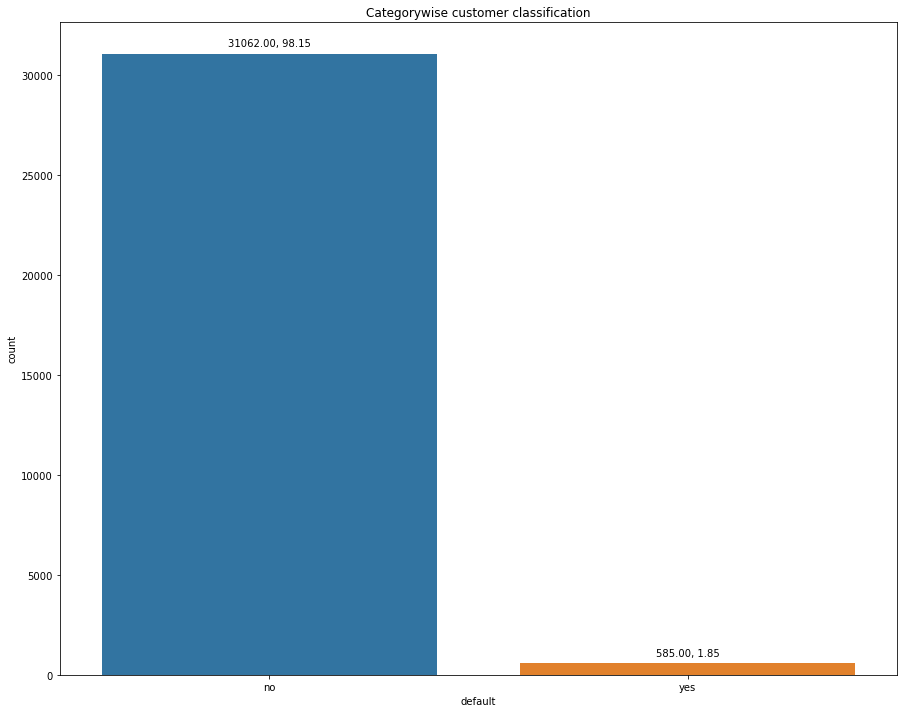

Housing


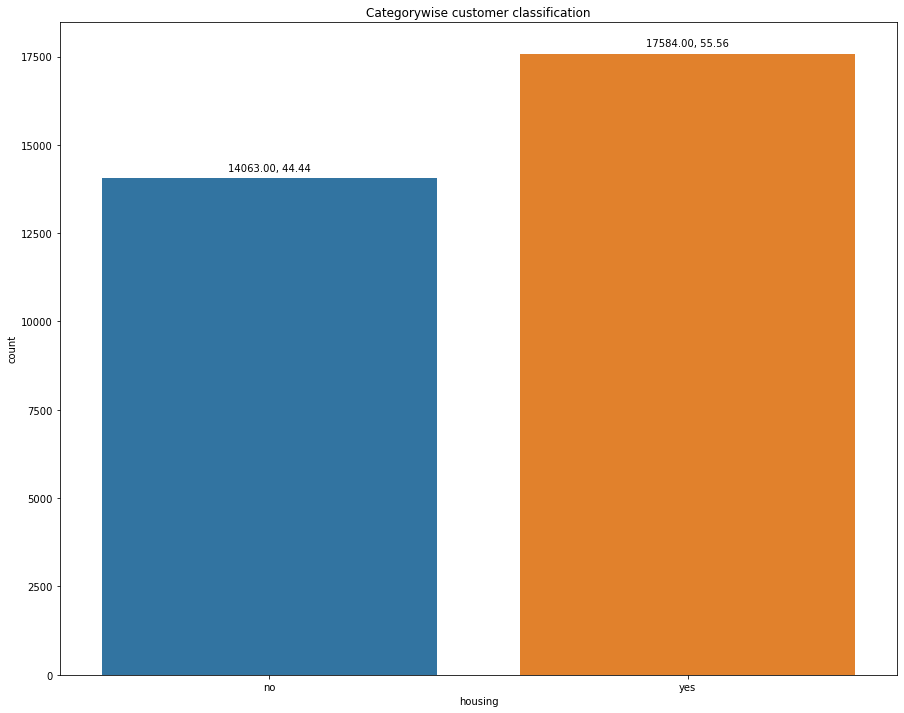

Loan


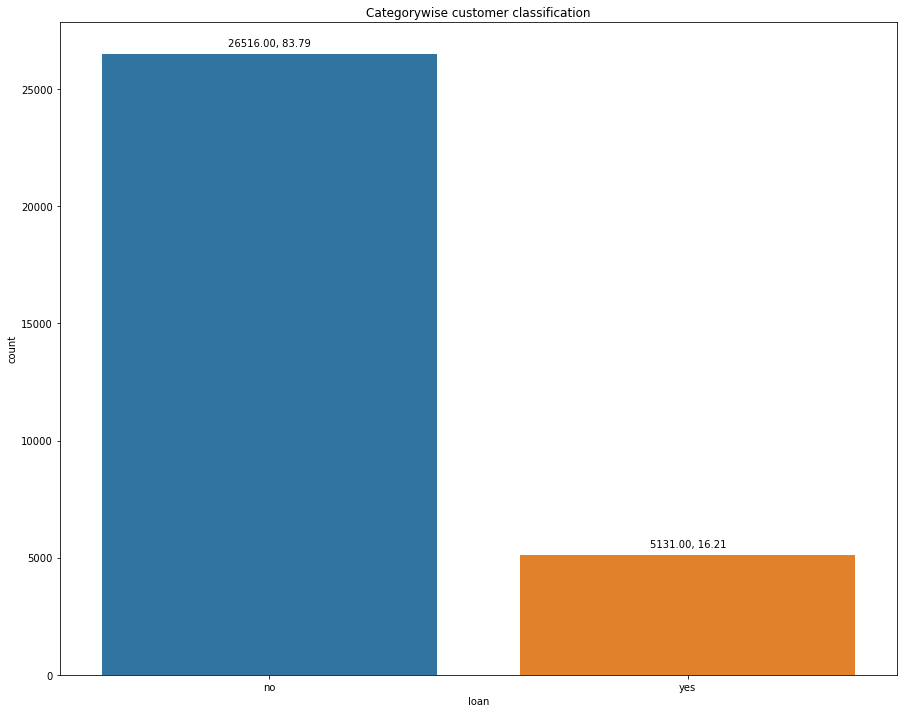

Contact


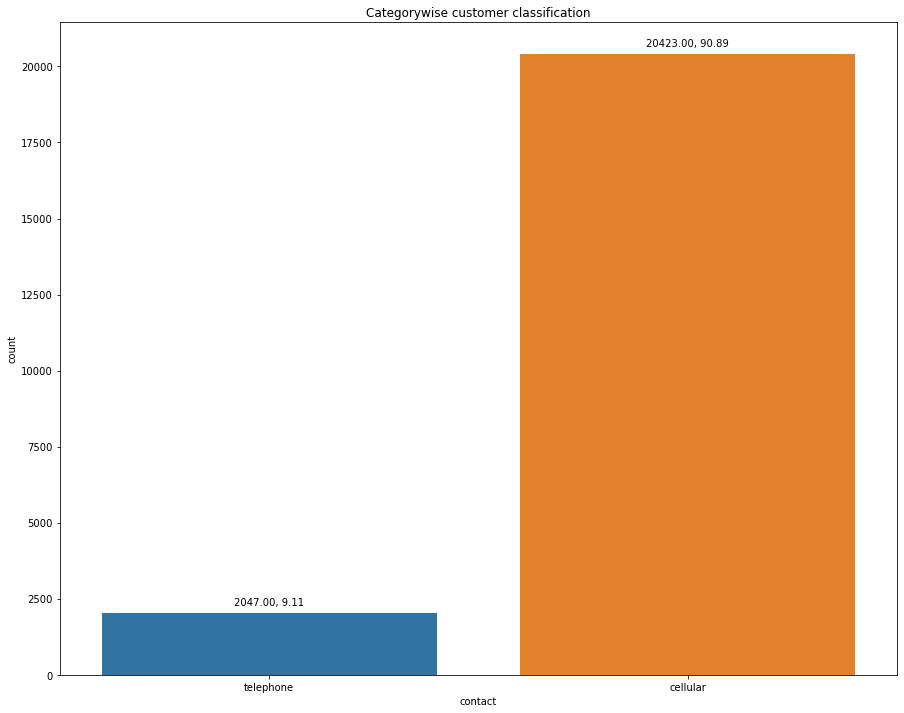

Month


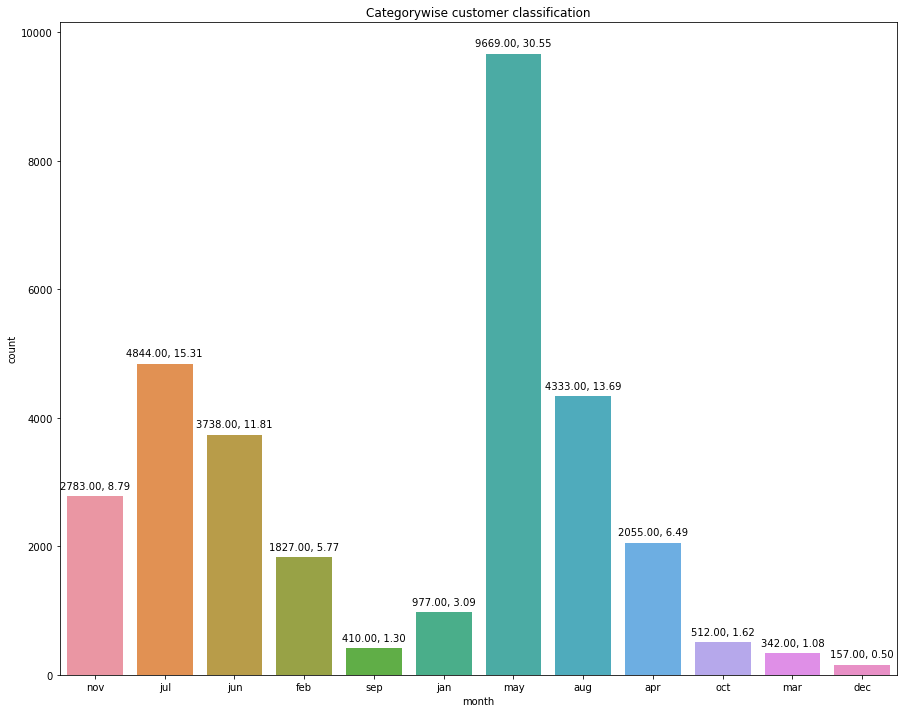

Poutcome


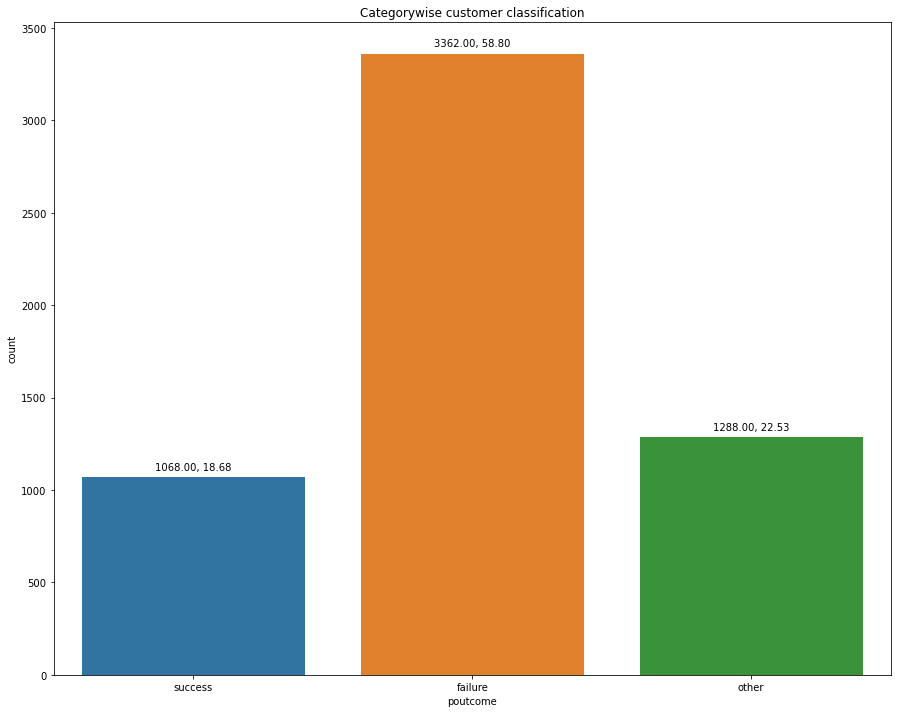

Subscribed


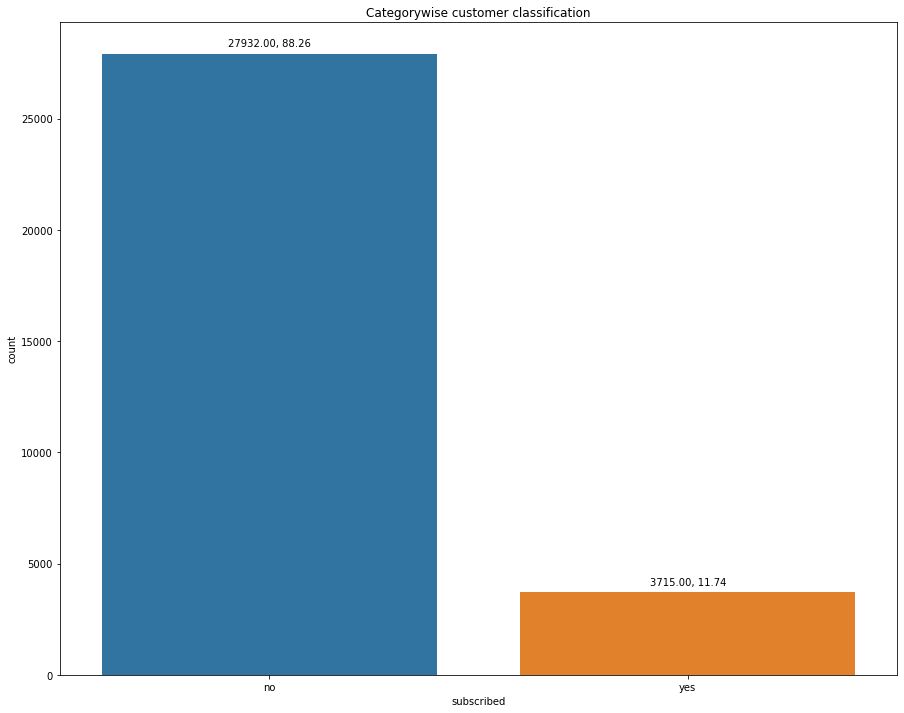

In [16]:
for column in data_categorical:
    plt.figure(figsize=(15,12))
    print(column.title())
    ax = sns.countplot(x = bankdata[column])
    label_values(ax)
    plt.title('Categorywise customer classification')
    plt.show()

From the above plots we can see that column 'Default' has 

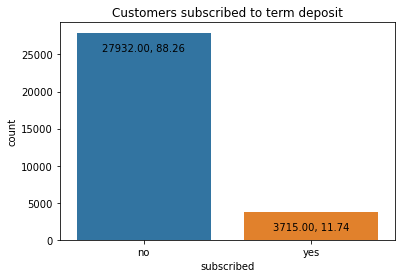

In [17]:
ax = sns.countplot(x = bankdata["subscribed"])  #Imbalanced dataset
label_values(ax, spacing=-20)
plt.title('Customers subscribed to term deposit')
plt.show()

Job


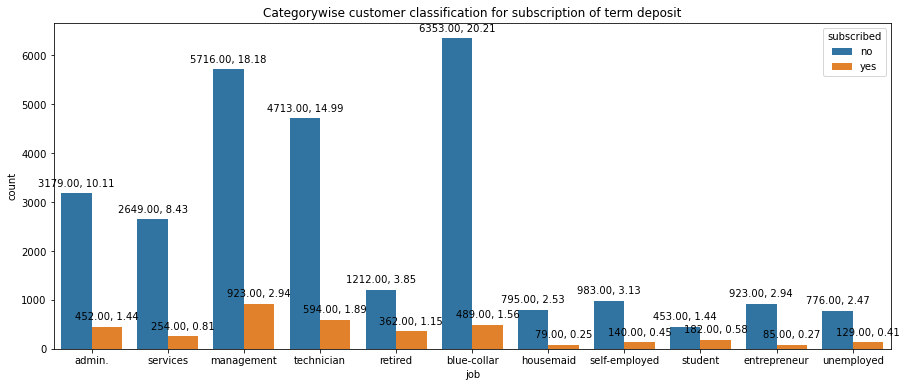

Marital


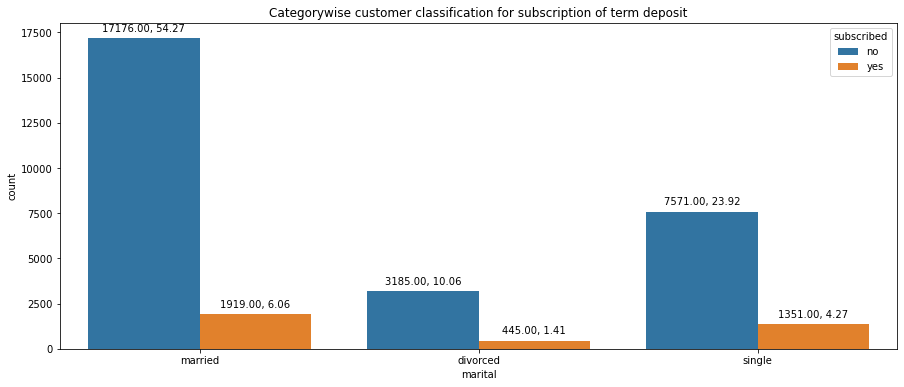

Education


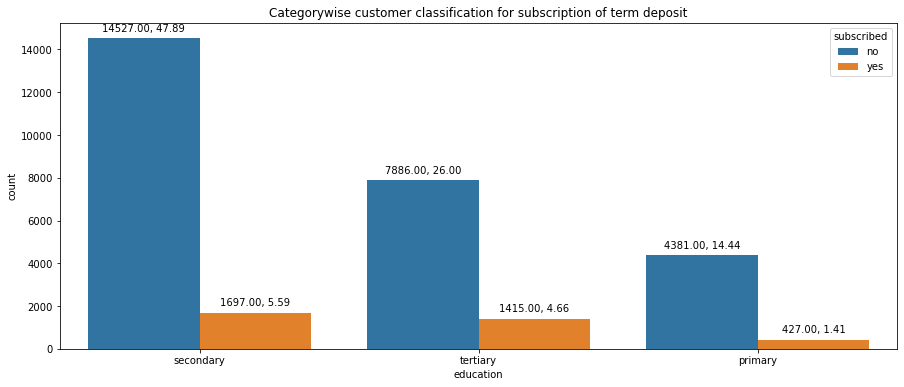

Default


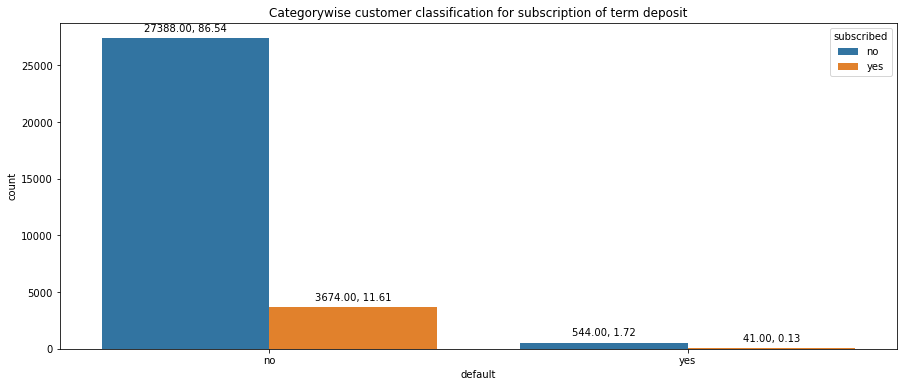

Housing


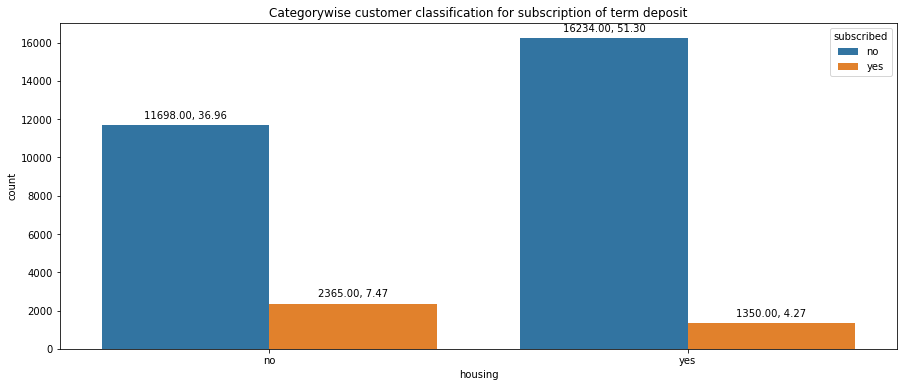

Loan


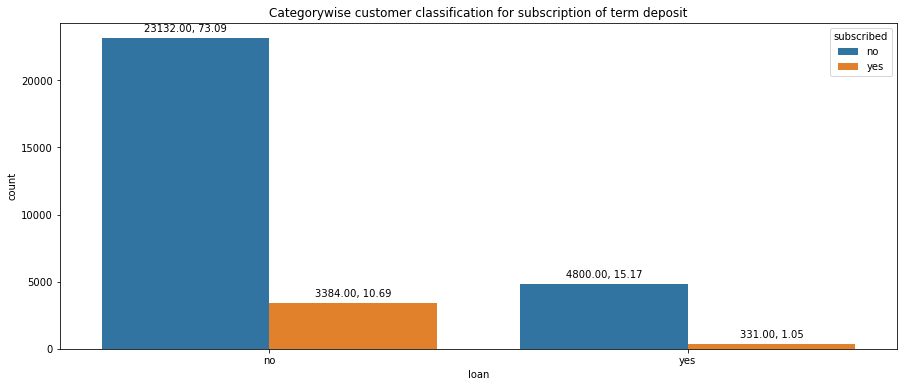

Contact


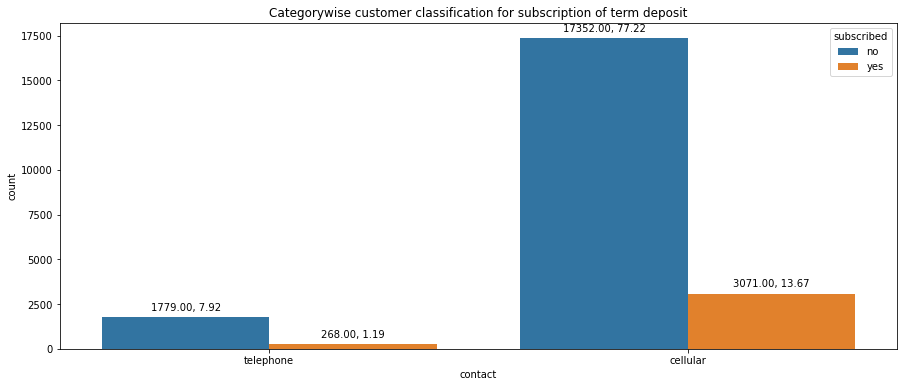

Month


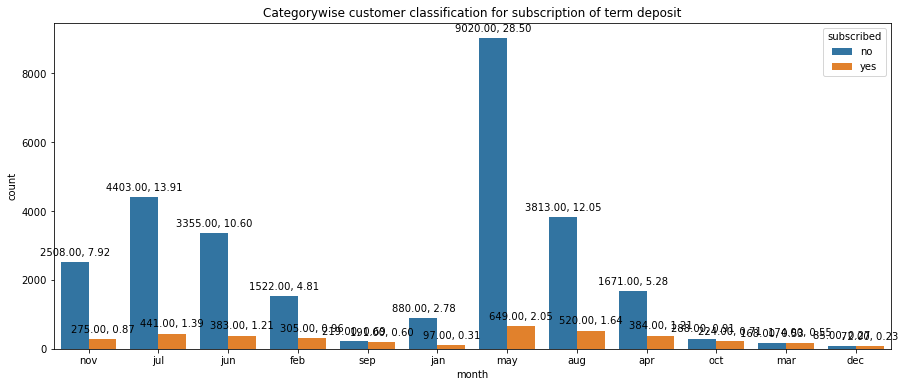

Poutcome


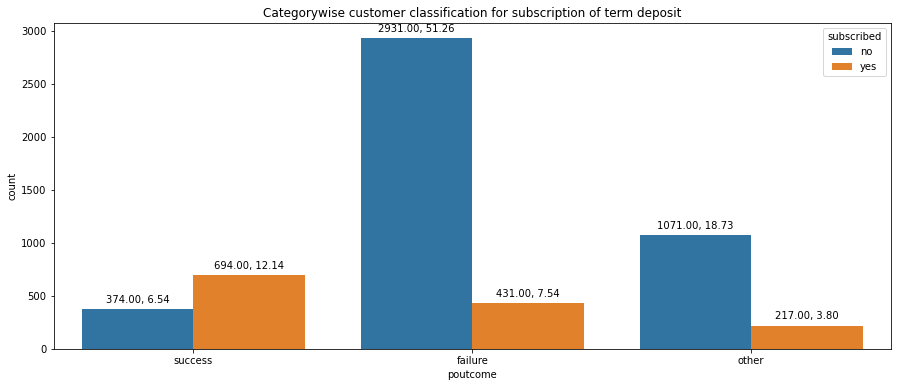

Subscribed


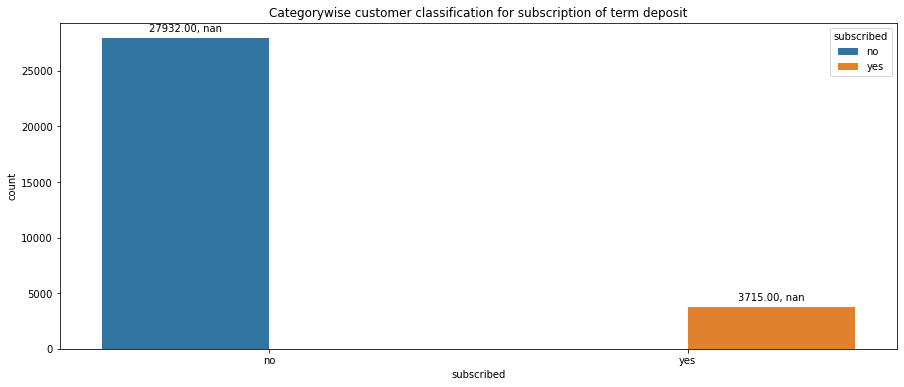

In [18]:
for column in data_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = bankdata[column], hue=bankdata["subscribed"])
    label_values(ax)
    plt.title('Categorywise customer classification for subscription of term deposit')
    plt.show()


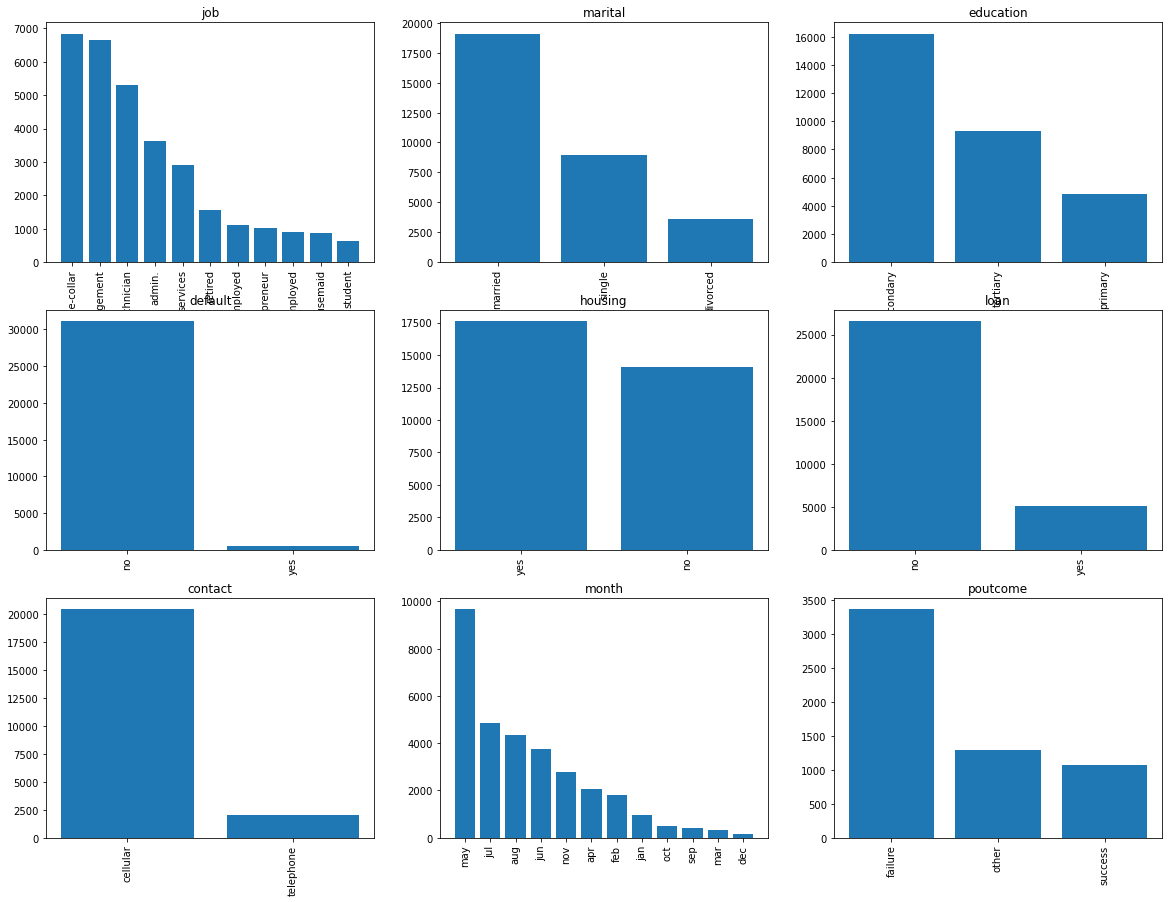

In [19]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = bankdata[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

from the above graphs we can see that default column has no impact on output so can drop this column here

In [20]:
# Default variable has no impact on the client subscribing for term deposit.
bankdata.drop(["default"], axis = 1, inplace=True)

In [21]:
data_categorical = list(set(data_categorical) - set(['default']))

In [22]:
bankdata.dropna(inplace=True)

In [23]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5430 entries, 3 to 31645
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          5430 non-null   int64 
 1   age         5430 non-null   int64 
 2   job         5430 non-null   object
 3   marital     5430 non-null   object
 4   education   5430 non-null   object
 5   balance     5430 non-null   int64 
 6   housing     5430 non-null   object
 7   loan        5430 non-null   object
 8   contact     5430 non-null   object
 9   day         5430 non-null   int64 
 10  month       5430 non-null   object
 11  duration    5430 non-null   int64 
 12  campaign    5430 non-null   int64 
 13  pdays       5430 non-null   int64 
 14  previous    5430 non-null   int64 
 15  poutcome    5430 non-null   object
 16  subscribed  5430 non-null   object
dtypes: int64(8), object(9)
memory usage: 763.6+ KB


b. Numerical Variables

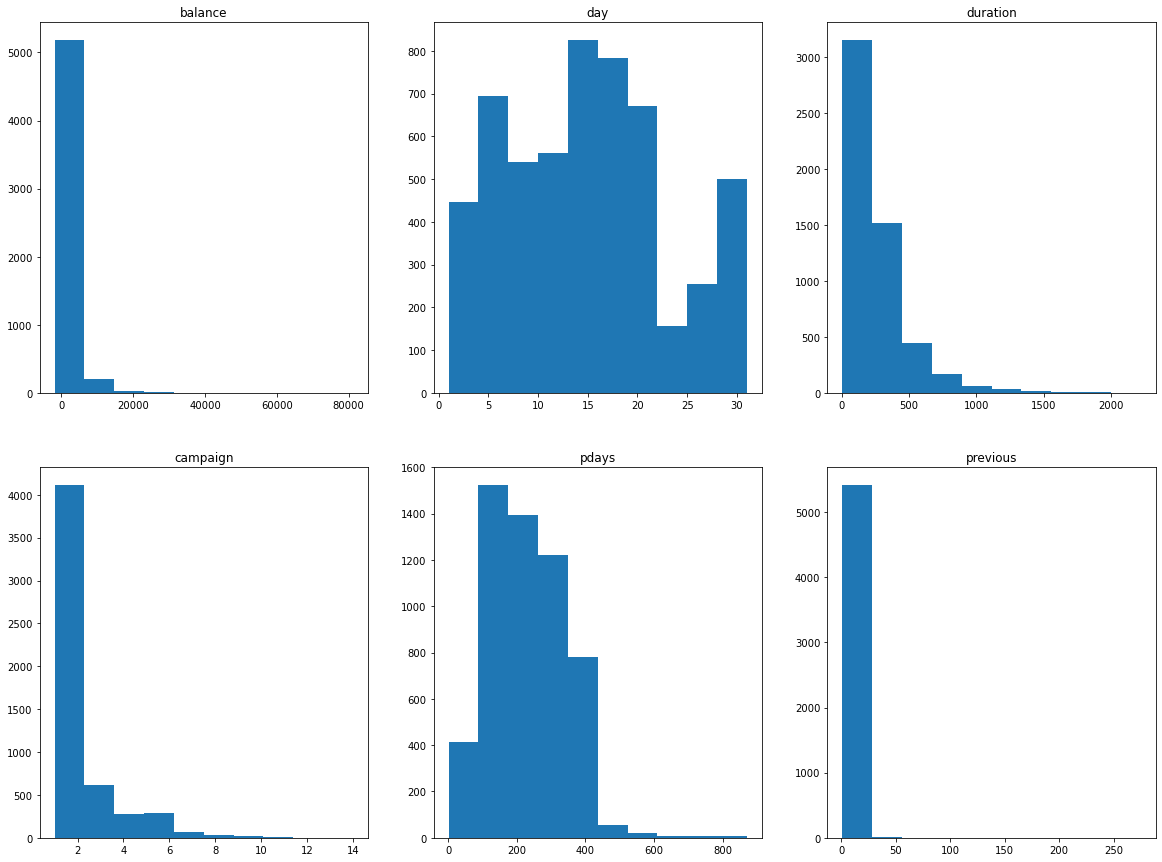

In [24]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(bankdata[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns). 

In [25]:
bankdata[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,5430.000000,5430.000000,5430.000000
mean,222.398527,2.066483,3.181400
std,112.028834,1.530737,4.976466
min,1.000000,1.000000,1.000000
25%,131.000000,1.000000,1.000000
50%,195.000000,2.000000,2.000000
75%,326.000000,2.000000,4.000000
max,871.000000,14.000000,275.000000


Percentage of 'pdays' values above 400:

In [26]:
len (bankdata[bankdata['pdays'] > 400] ) / len(bankdata) * 100

2.3756906077348066

In [27]:
len (bankdata[bankdata['pdays'] > 400] )

129

In [28]:
above_400=159/31647
above_400

0.005024172907384586

In [29]:
len (bankdata[bankdata['pdays'] ==-1] )

0

In [30]:
minus_1=25924/31647
minus_1

0.8191613739058995

'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign Looking closer into 'pdays' data we can see that:¶

only 0.5 % of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values. -1 possibly means that the client wasn't contacted before or stands for missing data. Since we are not sure exactly what -1 means I suggest to drop this column, because -1 makes more than 80% of the values of the column.

# Percentage of 

# Analysis of the Subscribed column

It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should look at 'subscribed' column and compare its values to other columns.
First of all we should look at the number of 'yes' and 'no' values in the target column 'subscribed'.

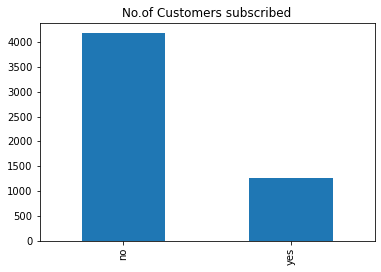

In [31]:
value_counts = bankdata['subscribed'].value_counts()

value_counts.plot.bar(title = 'No.of Customers subscribed')
label_values(ax, spacing=-20)
plt.show()

# Relationship between Independent variable (target variable) with other dependent variable

<AxesSubplot:title={'center':'Impact of job on Subscription'}>

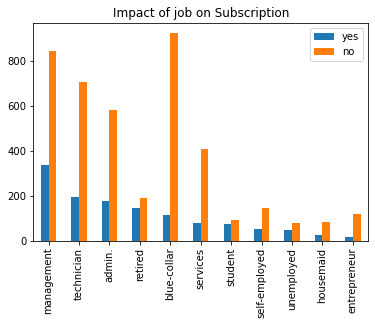

In [32]:
#Impact of job on Customers decision to subcribe or not to subscribe
job_bankdata= pd.DataFrame()

job_bankdata['yes'] = bankdata[bankdata['subscribed'] == 'yes']['job'].value_counts()
job_bankdata['no'] = bankdata[bankdata['subscribed'] == 'no']['job'].value_counts()

job_bankdata.plot.bar(title = 'Impact of job on Subscription')

<AxesSubplot:title={'center':'Impact of martial status on Subscription'}>

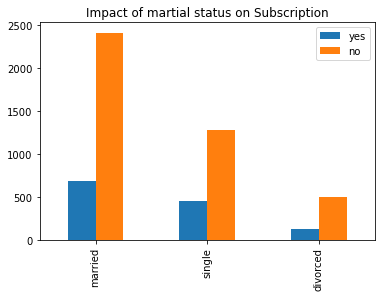

In [33]:
#Impact of martial status on Customers decision to subcribe or not to subscribe
marital_bankdata= pd.DataFrame()

marital_bankdata['yes'] = bankdata[bankdata['subscribed'] == 'yes']['marital'].value_counts()
marital_bankdata['no'] = bankdata[bankdata['subscribed'] == 'no']['marital'].value_counts()

marital_bankdata.plot.bar(title = 'Impact of martial status on Subscription')

<AxesSubplot:title={'center':'Impact of education on Subscription'}>

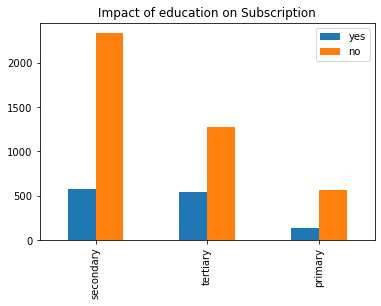

In [34]:
#Impact of education on Customers decision to subcribe or not to subscribe
education_bankdata= pd.DataFrame()

education_bankdata['yes'] = bankdata[bankdata['subscribed'] == 'yes']['education'].value_counts()
education_bankdata['no'] = bankdata[bankdata['subscribed'] == 'no']['education'].value_counts()

education_bankdata.plot.bar(title = 'Impact of education on Subscription')

<AxesSubplot:title={'center':'Impact of type of contact on Subscription'}>

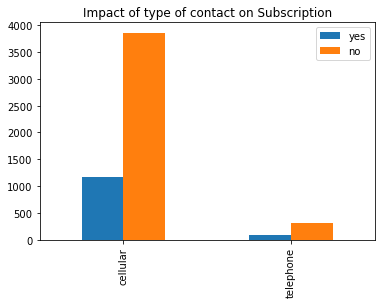

In [35]:
#Impact of type of contact on Customers decision to subcribe or not to subscribe
contact_bankdata= pd.DataFrame()

contact_bankdata['yes'] = bankdata[bankdata['subscribed'] == 'yes']['contact'].value_counts()
contact_bankdata['no'] = bankdata[bankdata['subscribed'] == 'no']['contact'].value_counts()

contact_bankdata.plot.bar(title = 'Impact of type of contact on Subscription')

In [36]:
#Impact of balance on Customers decision to subcribe or not to subscribe
balance_df = pd.DataFrame()
balance_df['balance_yes'] = (bankdata[bankdata['subscribed'] == 'yes'][['subscribed','balance']].describe())['balance']
balance_df['balance_no'] = (bankdata[bankdata['subscribed'] == 'no'][['subscribed','balance']].describe())['balance']

balance_df

,balance_yes,balance_no
count,1256.000000,4174.000000
mean,1926.483280,1421.353618
std,3848.688733,2672.255543
min,-522.000000,-1884.000000
25%,259.000000,143.250000
50%,868.000000,553.500000
75%,2351.500000,1561.500000
max,81204.000000,37378.000000


<AxesSubplot:title={'center':'Balance and Subscription decision'}>

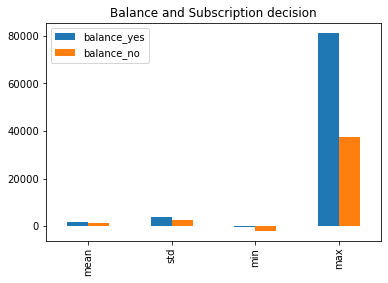

In [37]:
balance_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and Subscription decision')

In [38]:
#Impact of age on Customers decision to subcribe or not to subscribe
age_df = pd.DataFrame()
age_df['age_yes'] = (bankdata[bankdata['subscribed'] == 'yes'][['subscribed','age']].describe())['age']
age_df['age_no'] = (bankdata[bankdata['subscribed'] == 'no'][['subscribed','age']].describe())['age']

age_df

,age_yes,age_no
count,1256.000000,4174.000000
mean,42.410828,40.326066
std,13.900672,10.563165
min,19.000000,18.000000
25%,32.000000,32.000000
50%,38.000000,38.000000
75%,52.000000,47.000000
max,84.000000,89.000000


<AxesSubplot:title={'center':'Age and subscription decision'}>

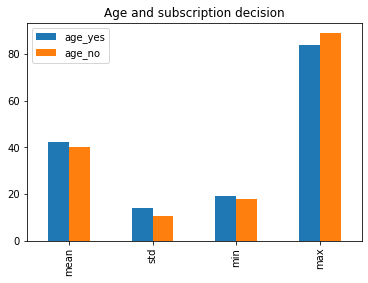

In [39]:
age_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and subscription decision')

In [40]:
#Impact of age on Customers decision to subcribe or not to subscribe
campaign_df = pd.DataFrame()
campaign_df['campaign_yes'] = (bankdata[bankdata['subscribed'] == 'yes'][['subscribed','campaign']].describe())['campaign']
campaign_df['campaign_no'] = (bankdata[bankdata['subscribed'] == 'no'][['subscribed','campaign']].describe())['campaign']

campaign_df

,campaign_yes,campaign_no
count,1256.000000,4174.000000
mean,1.783439,2.151653
std,1.149778,1.618474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,9.000000,14.000000


<AxesSubplot:title={'center':'campaign and subscription decision'}>

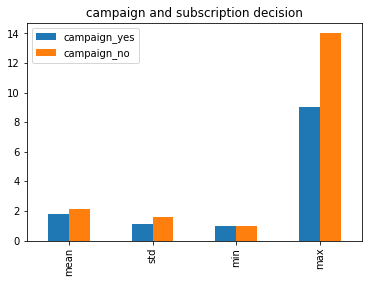

In [41]:
campaign_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'campaign and subscription decision')

In [42]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (bankdata[bankdata['subscribed'] == 'yes'][['subscribed','previous']].describe())['previous']
p_df['previous_no'] = (bankdata[bankdata['subscribed'] == 'no'][['subscribed','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,1256.000000,4174.000000
mean,3.252389,3.160038
std,3.375916,5.365596
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit '}>

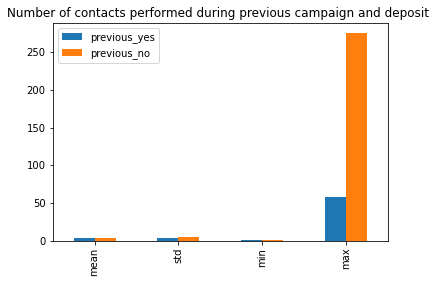

In [43]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit ')

Looking at the diagrams above we can conclude that:

People who subscribed for term deposit tend to have greater balance and age values.
People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

# Data Cleaning

Before we will be able to apply machine learning techniques, we should prepare the dataset for processing:

Convert columns with 'yes' and 'no' values to boolean columns;
Convert categorical columns into dummy variables.

In [44]:
def get_dummy_from_bool(row, column_name):
    ''' Returns 0 if value in column_name is no, returns 1 if value in column_name is yes'''
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, bankdata):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = bankdata[bankdata[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(bankdata):
    '''
    INPUT
    df - pandas dataframe containing bank marketing campaign dataset
    
    OUTPUT
    df - cleaned dataset:
    1. columns with 'yes' and 'no' values are converted into boolean variables;
    2. categorical columns are converted into dummy variables;
    3. drop irrelevant columns.
    4. impute incorrect values
    '''
    
    cleaned_df = bankdata.copy()
    
    #convert columns containing 'yes' and 'no' values to boolean variables and drop original columns
    bool_columns = ['housing', 'loan', 'subscribed']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = bankdata.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    
    #convert categorical columns to dummies
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    #drop irrelevant columns
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    
    #impute incorrect values and drop original columns
    cleaned_df['campaign_cleaned'] = bankdata.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = bankdata.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [45]:
#clean the dataset
cleaned_df = clean_data(bankdata)
cleaned_df.head()

,ID,age,balance,day,duration,housing_bool,loan_bool,subscribed_bool,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,campaign_cleaned,previous_cleaned
3,43962,57,3287,22,867,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,3.0
28,30448,45,858,5,617,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2.0
31,30574,39,0,6,13,1,0,0,0,0,...,0,0,0,0,0,0,1,0,8,2.0
36,45155,63,3738,9,301,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,4.0
41,41042,68,2301,14,90,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1.0


In [46]:
cleaned_df.columns, len(cleaned_df.columns)

(Index(['ID', 'age', 'balance', 'day', 'duration', 'housing_bool', 'loan_bool',
        'subscribed_bool', 'job_blue-collar', 'job_entrepreneur',
        'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
        'job_services', 'job_student', 'job_technician', 'job_unemployed',
        'marital_married', 'marital_single', 'education_secondary',
        'education_tertiary', 'contact_telephone', 'month_aug', 'month_dec',
        'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
        'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
        'poutcome_success', 'campaign_cleaned', 'previous_cleaned'],
       dtype='object'),
 38)

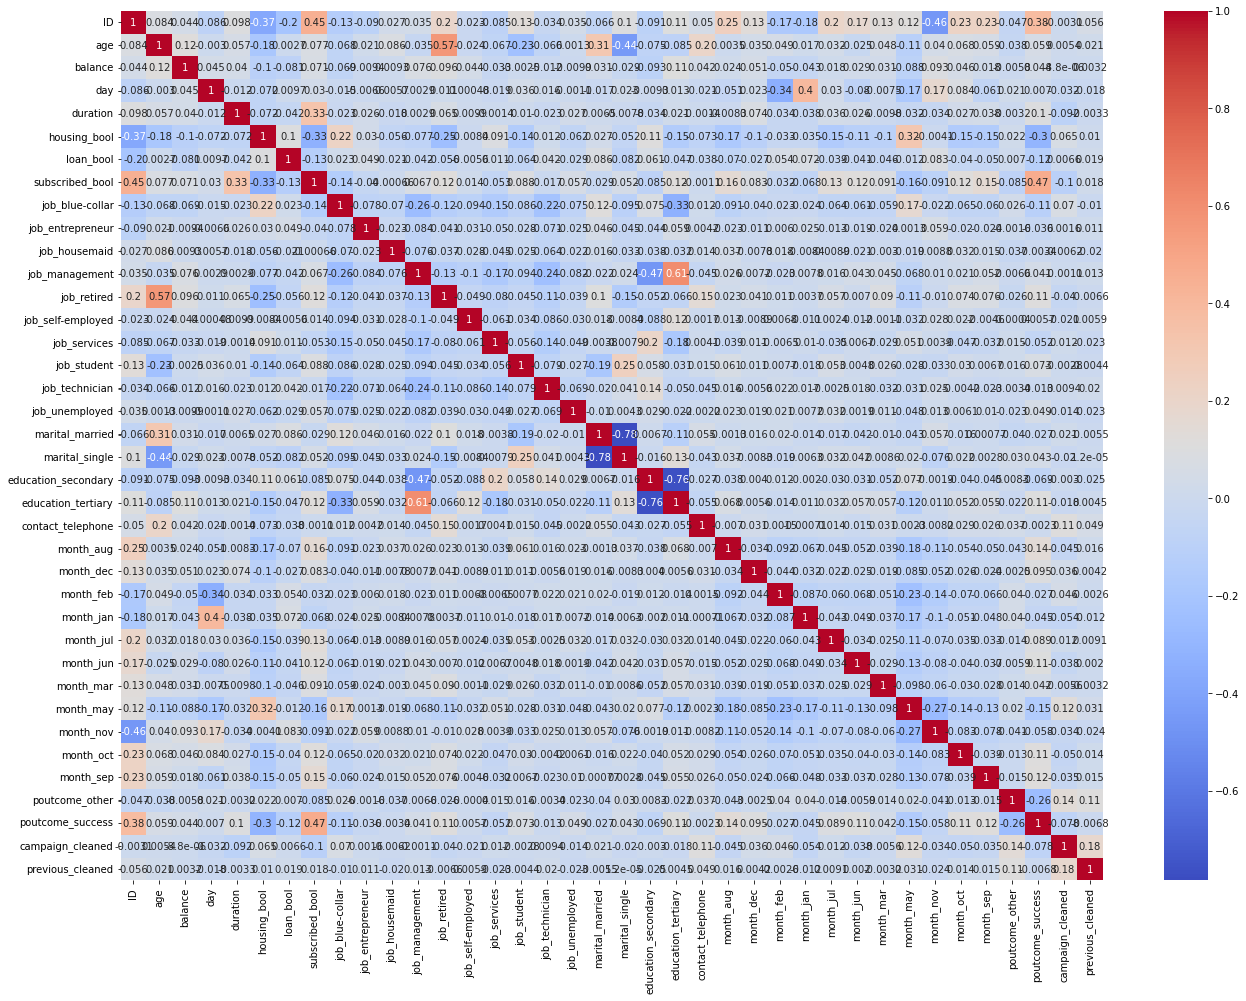

In [47]:
plt.figure(figsize=(22, 16))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Corelation With target variables')

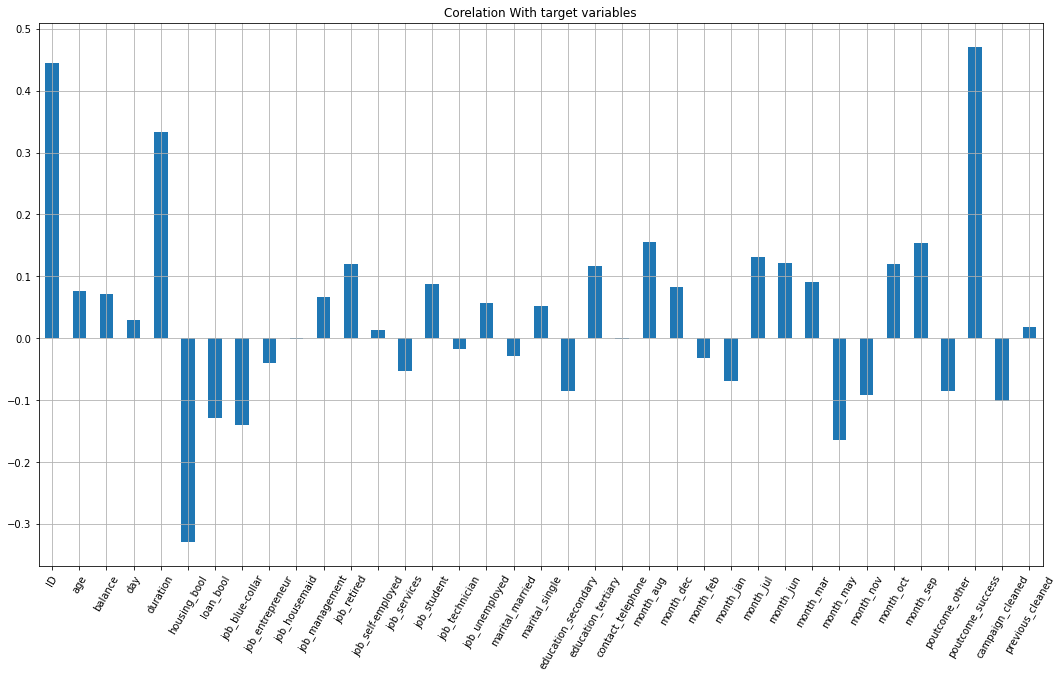

In [48]:
#The other way to check corelation and understand the relation with target column in better way
plt.figure(figsize=(18,10))
cleaned_df.drop('subscribed_bool',axis=1).corrwith(cleaned_df['subscribed_bool']).plot(kind='bar',grid=True)
plt.xticks(rotation=60)
plt.title('Corelation With target variables')

Observation:-

Here we can see that subscription has positive corelation with age, duration, job, martial status(married),poutcome(others) and negative corelation with housing, loan,job_blue collar, contact_telephone, month_april,poutcome_sucess, poutcome_unknown etc.


In [49]:
Test_data = pd.read_csv("test_bank.csv")#Loading the test data

In [50]:
#Checking shape
Test_data.shape

(13564, 17)

In [51]:
Test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [52]:
Test_data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [53]:
cleaned_df.isnull().sum()

ID                     0
age                    0
balance                0
day                    0
duration               0
housing_bool           0
loan_bool              0
subscribed_bool        0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
contact_telephone      0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0
campaign_cleaned       0
previous_cleaned       0
dtype: int64

In [54]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5430 entries, 3 to 31645
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5430 non-null   int64  
 1   age                  5430 non-null   int64  
 2   balance              5430 non-null   int64  
 3   day                  5430 non-null   int64  
 4   duration             5430 non-null   int64  
 5   housing_bool         5430 non-null   int64  
 6   loan_bool            5430 non-null   int64  
 7   subscribed_bool      5430 non-null   int64  
 8   job_blue-collar      5430 non-null   uint8  
 9   job_entrepreneur     5430 non-null   uint8  
 10  job_housemaid        5430 non-null   uint8  
 11  job_management       5430 non-null   uint8  
 12  job_retired          5430 non-null   uint8  
 13  job_self-employed    5430 non-null   uint8  
 14  job_services         5430 non-null   uint8  
 15  job_student          5430 non-null   

In [55]:
#Checking skewness
df=cleaned_df
df.skew()

ID                    -0.293528
age                    0.994972
balance                7.851000
day                    0.247629
duration               2.562362
housing_bool          -0.498941
loan_bool              2.034761
subscribed_bool        1.274777
job_blue-collar        1.572794
job_entrepreneur       6.104777
job_housemaid          6.845647
job_management         1.366027
job_retired            3.664419
job_self-employed      4.989705
job_services           2.872800
job_student            5.455164
job_technician         1.798276
job_unemployed         6.308870
marital_married       -0.277477
marital_single         0.783423
education_secondary   -0.145543
education_tertiary     0.696777
contact_telephone      3.239414
month_aug              3.517465
month_dec              7.711221
month_feb              2.543491
month_jan              3.712003
month_jul              5.644012
month_jun              4.905778
month_mar              6.622417
month_may              0.835222
month_no

In [61]:
x= df.drop("subscribed_bool",axis=1)
y= df["subscribed_bool"] #Target variable

In [76]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [64]:
#Removing Skewness
from sklearn.preprocessing import power_transform
x= power_transform(x,method="yeo-johnson")

In [65]:
x.shape

(5430, 37)

In [66]:
y=y.values.reshape(-1,1)
y.shape

(5430, 1)

# Preparing Dataset For Model Training

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [68]:
#Finding best random state


In [74]:
max_scr = 0
for i in range(0,5000):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,random_state=i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random_state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-",r2_score(y_test,pred_test)*100)

At random_state  2096  The model performs very well
At random_state:- 2096
Training r2_score is:- 40.993209119763755
Testing r2_score is:- 40.98590425832281
At random_state  2779  The model performs very well
At random_state:- 2779
Training r2_score is:- 41.025951878755464
Testing r2_score is:- 41.03045432816005
At random_state  2959  The model performs very well
At random_state:- 2959
Training r2_score is:- 41.06147958439483
Testing r2_score is:- 41.057920276325724
At random_state  3226  The model performs very well
At random_state:- 3226
Training r2_score is:- 41.09085093031762
Testing r2_score is:- 41.08750408353023
At random_state  3441  The model performs very well
At random_state:- 3441
Training r2_score is:- 41.038418850969634
Testing r2_score is:- 41.041220747517734
At random_state  3562  The model performs very well
At random_state:- 3562
Training r2_score is:- 41.00657510398814
Testing r2_score is:- 41.007948752662806
At random_state  4779  The model performs very well
At ran

In [75]:
#Finding best random state by other method
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


In [80]:
#Finding best random state by other method
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0

for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x_t,y,test_size = .25,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    
    if tempaccu>accu:
        accu = tempaccu
        best_rstate = i
        print(f"Best Accuracy {accu*100} found on random_state {best_rstate}")

Best Accuracy 36.08343229607118 found on random_state 30
Best Accuracy 43.647313574699254 found on random_state 31
Best Accuracy 45.61173728689638 found on random_state 53


In [81]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_t,y,random_state=112,test_size=0.25)

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [83]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train_b,y_train_b)
y_pred = LR.predict(x_test_b)
r2score = r2_score(y_test_b,y_pred)
cvscore = cross_val_score(LinearRegression(),x_train_b,y_train_b,cv=5).mean()
print(f"Accuracy = {r2score*100},Cross_val_score={cvscore*100} & difference = {(r2score*100)-(cvscore*100)}")

Accuracy = 39.31948558570705,Cross_val_score=40.01124525198881 & difference = -0.6917596662817616


In [84]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [85]:
#All algorithm by using for loop
model = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train_b,y_train_b)
    m.score(x_train_b,y_train_b)
    predm = m.predict(x_test_b)
    rds= r2_score(y_test_b,predm)
    print("Accuracy Score Of ",m,"is :")    
    print("R2-Score= ",rds*100)
    rdscore = cross_val_score(m,x_t,y,cv=10)
    rdc=rdscore.mean()
    print("Cross Val Score= ",rdc*100)
    print("Error:")
    print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,predm))
    print('Mean Squared Error:= ',mean_squared_error(y_test_b,predm))
    print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,predm)))    
    print("**************************************************************************************************************")
    print('\n')
    

Accuracy Score Of  LinearRegression() is :
R2-Score=  39.31948558570705
Cross Val Score=  40.09681347383632
Error:
Mean Absolute Error:=  0.24632153802518672
Mean Squared Error:=  0.10738311365005138
Root Mean Square Error;=  0.3276936277226815
**************************************************************************************************************


Accuracy Score Of  Lasso() is :
R2-Score=  -0.0024388609307424147
Cross Val Score=  -0.15844379729762714
Error:
Mean Absolute Error:=  0.3550523565511514
Mean Squared Error:=  0.17696905441784178
Root Mean Square Error;=  0.42067690026651305
**************************************************************************************************************


Accuracy Score Of  Ridge() is :
R2-Score=  39.31977389150706
Cross Val Score=  40.097196682524995
Error:
Mean Absolute Error:=  0.24632320788675982
Mean Squared Error:=  0.10738260345044633
Root Mean Square Error;=  0.3276928492513169
****************************************************

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

In [87]:
model = [RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),SGDRegressor()]

for m in model:
    m.fit(x_train_b,y_train_b)
    m.score(x_train_b,y_train_b)
    predm = m.predict(x_test_b)
    rds= r2_score(y_test_b,predm)
    print("Accuracy Score Of ",m,"is :")    
    print("R2-Score= ",rds*100)
    rdscore = cross_val_score(m,x_t,y,cv=3)
    rdc=rdscore.mean()
    print("Cross Val Score= ",rdc*100)
    print("Error:")
    print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,predm))
    print('Mean Squared Error:= ',mean_squared_error(y_test_b,predm))
    print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,predm)))
    print("**************************************************************************************************************")
    print('\n')
    
    

Accuracy Score Of  RandomForestRegressor() is :
R2-Score=  47.56920423346571
Cross Val Score=  44.53515068650382
Error:
Mean Absolute Error:=  0.18081737849779086
Mean Squared Error:=  0.0927840206185567
Root Mean Square Error;=  0.3046046956607148
**************************************************************************************************************


Accuracy Score Of  AdaBoostRegressor() is :
R2-Score=  40.767994028793176
Cross Val Score=  39.56802941441859
Error:
Mean Absolute Error:=  0.24119860721380676
Mean Squared Error:=  0.1048197644716809
Root Mean Square Error;=  0.3237588060141081
**************************************************************************************************************


Accuracy Score Of  GradientBoostingRegressor() is :
R2-Score=  46.90992938790291
Cross Val Score=  47.01736417018545
Error:
Mean Absolute Error:=  0.19076080304598156
Mean Squared Error:=  0.09395070462496347
Root Mean Square Error;=  0.3065137919000766
*************************

Observation:-

After using of all techniques i found that AdaBoostRegressor() is performing better with:-

R2-Score= 40.767994028793176 Cross Val Score= 39.56802941441859 Difference = 1.19

In [88]:
d=40.767994028793176- 39.56802941441859 
d

1.1999646143745863

However I will use Hyperparameter Tuning To boost the score

In [94]:
from sklearn.svm import SVC

In [95]:
svc_model = SVC()

In [121]:
params_grid_svc = {
    "kernel": ["linear", "rbf"],
    "degree": [1, 2]
}

In [123]:
svc_grid = training_model_hyperparameter(svc_model, 'roc_auc', params_grid_svc, x_train_b, y_train_b)

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
gb_model = GradientBoostingClassifier(verbose = 1)

In [100]:
params_grid_gb = {
    "n_iter_no_change": ['None', 5, 10],
    "n_estimators": [30, 50, 75, 100],
    "learning_rate": [0.05, 0.1, 0.15]
}

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={
    "n_iter_no_change": ['None', 5, 10],
    "n_estimators": [30, 50, 75, 100],
    "learning_rate": [0.05, 0.1, 0.15]
}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)
print(clf.best_params_)

{'learning_rate': 0.1, 'n_estimators': 50, 'n_iter_no_change': 10}


In [124]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_b,y_train_b)
gbr.score(x_train_b,y_train_b)
predgbr = gbr.predict(x_test_b)
rds= r2_score(y_test_b,predgbr)
print("Accuracy Score Of ",gbr,"is :")    
print("R2-Score= ",rds*100)
rdscore = cross_val_score(gbr,x_t,y,cv=3)
rdc=rdscore.mean()
print("Cross Val Score= ",rdc*100)
print("Error:")
print('Mean Absolute Error:= ',mean_absolute_error(y_test_b,predgbr))
print('Mean Squared Error:= ',mean_squared_error(y_test_b,predgbr))
print("Root Mean Square Error;= ",np.sqrt(mean_squared_error(y_test_b,predgbr)))
print("**************************************************************************************************************")
print('\n')
    

Accuracy Score Of  GradientBoostingRegressor() is :
R2-Score=  46.97659437715939
Cross Val Score=  46.99939571538861
Error:
Mean Absolute Error:=  0.1905382315553447
Mean Squared Error:=  0.0938327311010587
Root Mean Square Error;=  0.30632128737823416
**************************************************************************************************************




In [125]:
#Model Saving with best model GradientBoostingRegressor
import joblib 

joblib.dump(gbr,'gbrfile.obj')

['gbrfile.obj']

In [126]:
#Loading to see my model
gbr_from_joblib = joblib.load('gbrfile.obj')
gbr_from_joblib

GradientBoostingRegressor()

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [108]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [109]:
from sklearn import metrics

In [110]:
# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.3f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.3f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
# Train model using hyperparmeter tuning
def training_model_hyperparameter(model, scoring, params_grid, X_train, y_train):
    folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state=100)

    grid = GridSearchCV(estimator = model, scoring=scoring, param_grid = params_grid, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3)
    grid.fit(X_train, y_train)
    return grid

In [112]:
# Predict values and propability of training and testing data
def prediction_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob

In [113]:
from sklearn.linear_model import LogisticRegression

In [115]:
logreg = LogisticRegression(solver='lbfgs', random_state = 100)
logreg = logreg.fit(x_train_b, y_train_b)

In [118]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(logreg, x_train_b, y_train_b, x_test_b, y_test_b)

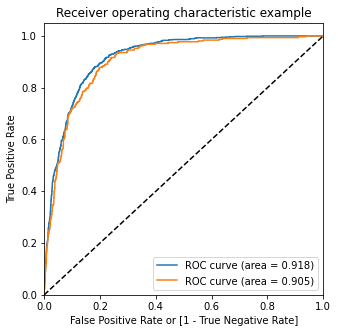

In [119]:
draw_roc(y_train_b, y_train_pred_prob, y_test_b, y_test_pred_prob)

In [120]:
print("Accuracy train: ", accuracy_score(y_train_b, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test_b, y_test_pred))

Accuracy train:  0.8592829076620825
Accuracy test:  0.8586156111929307


# Model Saving

In [89]:
#Model Saving with best model GradientBoostingRegressor
import joblib 

In [103]:
joblib.dump(gbr,'gbrfile.obj')

['gbrfile.obj']

In [105]:
#Loading to see my model
gbr_from_joblib = joblib.load('gbrfile.obj')
gbr_from_joblib

GradientBoostingRegressor(criterion='learning_rate', loss='n_iter_no_change')